In [ ]:
import numpy as np
import pandas as pd
import os
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
DATA_PATH=os.path.join("datasets","tweets_folder")

def load_data(data_path=DATA_PATH):
    tweets_path = os.path.join(DATA_PATH, "Tweets.csv")
    return pd.read_csv(tweets_path)


In [ ]:
airline_tweets = load_data()
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
airline_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [ ]:
# Data Plotting for data exploration

In [ ]:
airline_tweets.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

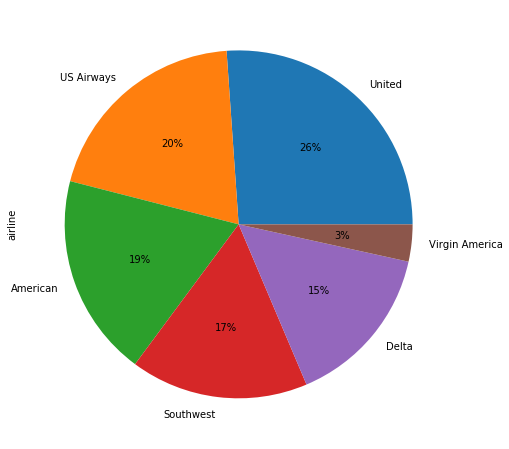

In [ ]:
airline_tweets.airline.value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(10,8))
plt.show()


In [ ]:
airline_tweets.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

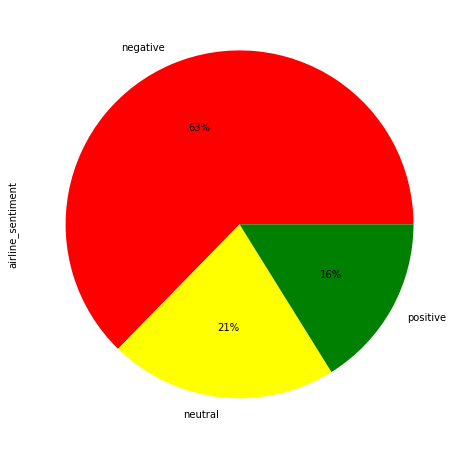

In [ ]:
airline_tweets.airline_sentiment.value_counts().plot(kind="pie",autopct='%1.0f%%',colors=["red","yellow","green"],figsize=(10,8))
plt.show()

In [ ]:
# we can see that the majority of the tweets were negative (63%) followed by neutral(21%) and the remaining are positive(16%)

In [ ]:
# Now lets see the distrubution of individual flights

In [ ]:
airline_sentiment2 =airline_tweets.groupby(['airline','airline_sentiment']).airline_sentiment.count()
airline_sentiment2

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: airline_sentiment, dtype: int64

In [ ]:
airline_sentiment2.unstack()  #---- to stack it up---> airline_sentiment2.unstack().stack()

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


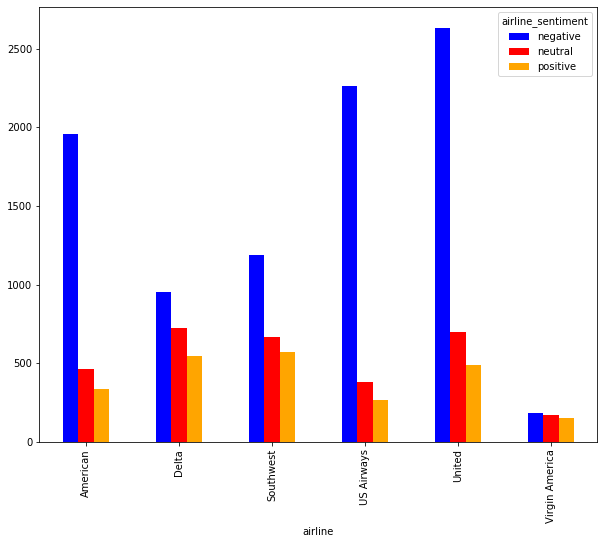

In [ ]:
airline_sentiment2.unstack().plot(kind="bar",figsize=(10,8),color=['blue','red','orange'],legend=True)
plt.show()

In [ ]:
#It is evident from the output that for almost all the airlines, the majority of the tweets are negative,
# followed by neutral and positive tweets. Virgin America is probably the only airline where the ratio
# of the three sentiments is somewhat similar.

In [ ]:
# Plotting the tweet confidence levels

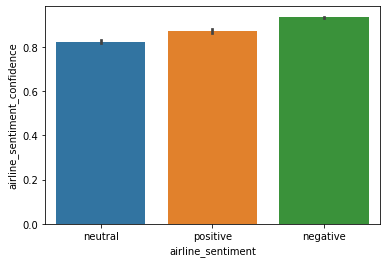

In [ ]:
import seaborn as sns
sns.barplot(x="airline_sentiment",y="airline_sentiment_confidence",data=airline_tweets)
plt.show()

In [ ]:
# From the output, you can see that the confidence level for negative tweets is higher
# compared to positive and neutral tweets.

# Data Cleaning

In [ ]:
# Tweets contain many slang words and punctuation marks. the tweets need to be cleaned before they can be used for
# training the machine learning model.
# However, before cleaning the tweets, we can divide the dataset into feature and label sets.

In [ ]:
# X= feature set consists of tweets only as we are working on the tweets data...i.e in the 11th column
# y= Label set which consists of sentiment


In [ ]:
features=airline_tweets.iloc[:,10].values

labels=airline_tweets.iloc[:,1].values

In [ ]:
features[:5]

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
       "@VirginAmerica and it's a really big bad thing about it"],
      dtype=object)

In [ ]:
labels[:5]

array(['neutral', 'positive', 'neutral', 'negative', 'negative'],
      dtype=object)

In [ ]:
len(features)

14640

In [ ]:
# Now , in order to clean the data, we use regular expressions
X= features

In [ ]:
processed_features=[]

for sentence in range(0,len(X)):
    processed_feature=re.sub(r'\W',' ',str(X[sentence])) # removes all special characters - uncle's->uncle s
    processed_feature=re.sub(r'\s+[a-zA-Z]\s+',' ',processed_feature)# removes single characters - unlce s -> unlce
    processed_feature=re.sub(r'^[a-zA-Z]\s+',' ',processed_feature)#removes single characters from start
    processed_feature=re.sub(r'\s+',' ',processed_feature,flags=re.I)# replaces multiple spaces with single space
    processed_feature=re.sub(r'^b\s+',' ',processed_feature) # removes byte prefix 'b' left over in the process
    processed_feature=processed_feature.lower()# change to lower case

    processed_features.append(processed_feature)





# Representing Text in Numeric form

In [ ]:
# Statistical Algorithms use mathematics to train machine learning models and mathematics work on numbers
# To work with statistical algorithms , we first need to convert the text into numerical form


In [ ]:
# To convert text to numbers, there are 3 methods :
# Bag of Words and TF-IDF are two of them and we will work on these two methods.

In [ ]:
# Bag of words:
# we have 3 text files :
# file1= " I like to study", file2 =" It was a good game", file3 ="I want to watch TV and then study"

In [ ]:
# First step is: create a vocabulary of all unique words(not repeated words)
# for the above 3 files
vocab= ['I', 'like','to','study','It','was','a','good','game','want','watch','TV','and','then']

In [ ]:
# Step2: convert each file into a feature vector using the vocabulary.
# The length of each feature vector is equal to the length of the vocabulary

In [ ]:
# The frequency(number of times of occurence) of the word in the document will replace the actual word in the vocabulary
# if vocabulary' word is not file, then that file feature vector will have a 0 value in that place

In [ ]:
# for File1: the feature vector = [1,1,1,1,0,0,0,0,0,0,0,0,0,0]
# In bag of words, each word has the same weight

In [ ]:
#

# TF-IDF  (Term Frequency- Inverse Document Frequency):

#
# The word that occur MORE in individual file and LESS in all the files, contribute more towards classification
# In other words, repetetive words in files, will give less weight(and so less useful) for classification.


In [ ]:
# TF = (frequency of a words in the document)/ (total number of words in the document)

# IDF = log((Total number of  documents)/number of docs containing the word))

In [ ]:

# TF-IDF using Scikit-learn ( it has TfidfVectorizer class to convert text to TF-IDF vectors)
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer(max_features=2500,min_df=7,max_df=0.8,stop_words=stopwords.words('english'))
#max_features: it uses only 2500 most frequently occuring words to create a bag of words feature vector
#max_df : use words that occurs in 80% of the documnets
#min_df : use words that occur in atleast 7 of the documents

processed_features= vectorizer.fit_transform(processed_features).toarray()


In [ ]:
# dividing data into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [ ]:
# Training the model with RandomForestClassifier (as it can act on normalized data)
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=100,random_state=42)
text_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# Making predictions and evaluating the model
predictions=text_classifier.predict(X_test)
print(predictions)

['negative' 'neutral' 'negative' ... 'negative' 'negative' 'negative']


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1627  175   68]
 [ 242  319   53]
 [  95   82  267]]
              precision    recall  f1-score   support

    negative       0.83      0.87      0.85      1870
     neutral       0.55      0.52      0.54       614
    positive       0.69      0.60      0.64       444

    accuracy                           0.76      2928
   macro avg       0.69      0.66      0.68      2928
weighted avg       0.75      0.76      0.75      2928

0.7558060109289617


In [ ]:
# The algorithm achieved an accuracy of 75.58%

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'rbf', random_state = 42,cache_size=400,gamma = 'scale')

In [ ]:
svm_classifier.fit(X_train, y_train)
svm_predictions=svm_classifier.predict(X_test)
#print(predictions)

print(confusion_matrix(y_test,svm_predictions))
print(classification_report(y_test,svm_predictions))
print(accuracy_score(y_test, svm_predictions))

[[1728  112   30]
 [ 288  292   34]
 [ 127   66  251]]
              precision    recall  f1-score   support

    negative       0.81      0.92      0.86      1870
     neutral       0.62      0.48      0.54       614
    positive       0.80      0.57      0.66       444

    accuracy                           0.78      2928
   macro avg       0.74      0.65      0.69      2928
weighted avg       0.77      0.78      0.76      2928

0.7756147540983607


In [ ]:
# The algorithm achieved an accuracy of 77.56 % and is better than random forest with accuracy of 75.58%

In [ ]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state = 42)
log_classifier.fit(X_train, y_train)

# Predicting the Test set results
log_predictions = log_classifier.predict(X_test)

# Making the Confusion Matrix

print(confusion_matrix(y_test,log_predictions))
print(classification_report(y_test,log_predictions))
print(accuracy_score(y_test, log_predictions))

C:\Users\SonyTF\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SonyTF\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[1665  152   53]
 [ 220  341   53]
 [  91   56  297]]
              precision    recall  f1-score   support

    negative       0.84      0.89      0.87      1870
     neutral       0.62      0.56      0.59       614
    positive       0.74      0.67      0.70       444

    accuracy                           0.79      2928
   macro avg       0.73      0.70      0.72      2928
weighted avg       0.78      0.79      0.78      2928

0.7865437158469946


In [ ]:
# The algorithm achieved an accuracy of 78.65 % and is still better than  the obove two

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2)


In [ ]:
knn_classifier.fit(X_train,y_train)

knn_predictions=knn_classifier.predict(X_test)
print(confusion_matrix(y_test,log_predictions))
print(classification_report(y_test,log_predictions))
print(accuracy_score(y_test, log_predictions))

[[1665  152   53]
 [ 220  341   53]
 [  91   56  297]]
              precision    recall  f1-score   support

    negative       0.84      0.89      0.87      1870
     neutral       0.62      0.56      0.59       614
    positive       0.74      0.67      0.70       444

    accuracy                           0.79      2928
   macro avg       0.73      0.70      0.72      2928
weighted avg       0.78      0.79      0.78      2928

0.7865437158469946
